# Example use of our algorithm

In [1]:
%cd ..
from src import embedding, visualization
from data import small

/home/jr/Projects/GMLFinalProject


/home/jr/.pyenv/versions/3.11.2/envs/gml-final/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Embed simple 2D data

In [2]:
data2d = small.TWO_CLOUDS_2D
graph2d = embedding.build_graph(data2d)

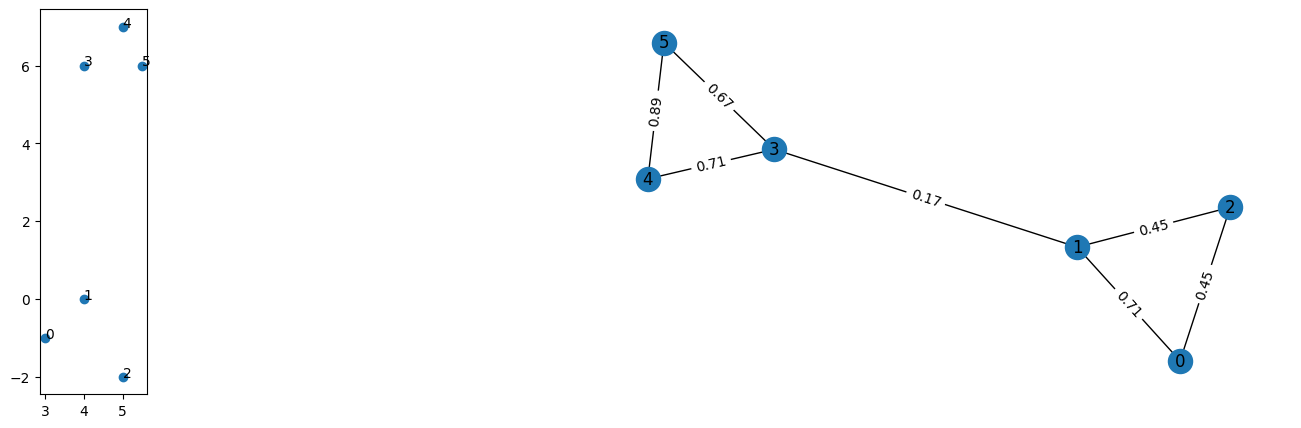

In [3]:
# change aspect to 'auto' for nicer graph
visualization.show_data(data2d, graph2d, aspect='equal')

In [4]:
embeddings2d = embedding.embed_graph(graph2d, dims=2, walk_length=100, num_walks=10, seed=0)

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 305.37it/s]


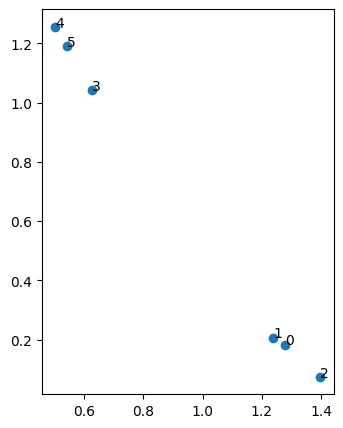

In [5]:
visualization.show_embedding(embeddings2d)

## Embed simple 3D data

In [6]:
data3d = small.THREE_CLOUDS_3D
graph3d = embedding.build_graph(data3d)

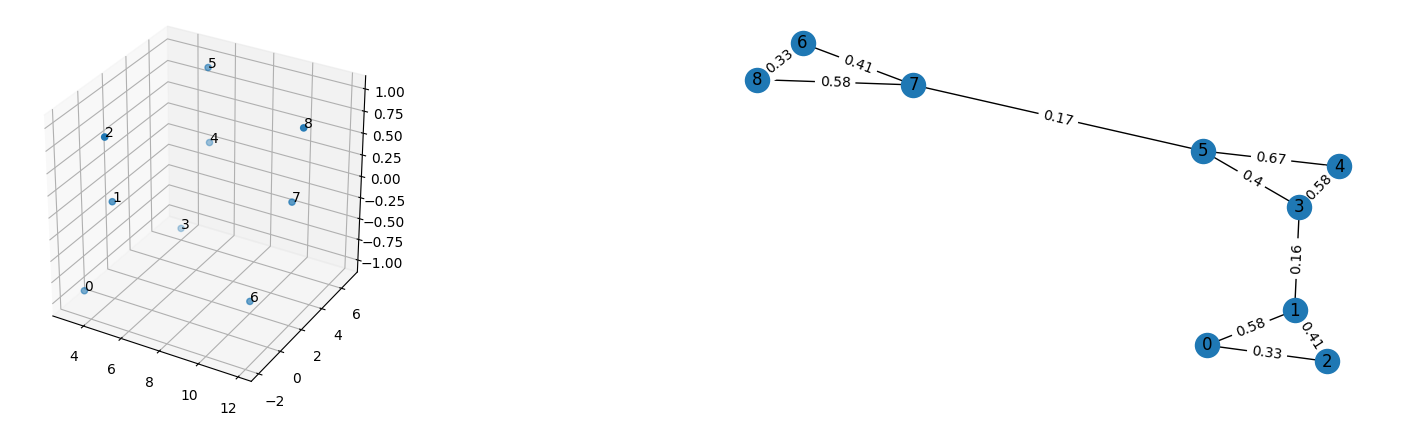

In [7]:
visualization.show_data(data3d, graph3d)

In [8]:
embeddings3d = embedding.embed_graph(graph3d, dims=2, walk_length=100, num_walks=10, seed=0)

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 205.83it/s]


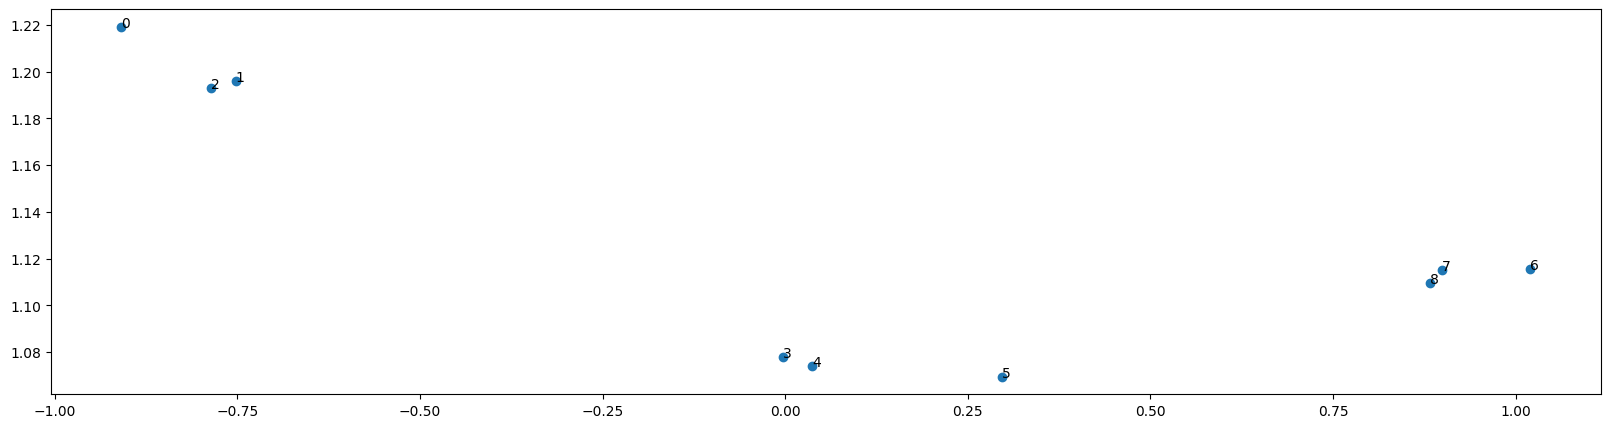

In [9]:
visualization.show_embedding(embeddings3d, aspect='auto')